Dear professor,
I conducted my procession in kaggle environment due to the GPU limitation of Google Colab.
But I changed the code so you can run directly in Colab environment. Thank you!

# Project3-Part2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# suppress warnings
import warnings;
warnings.filterwarnings('ignore');

# common imports
import pandas as pd
import numpy as np
import math
import re
import glob
import os
import sys
import json
import random
import pprint as pp
import textwrap
import sqlite3
import logging

import spacy
import nltk

from tqdm.auto import tqdm
# register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# pandas display options
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options
pd.options.display.max_columns = 30 # default 20
pd.options.display.max_rows = 60 # default 60
pd.options.display.float_format = '{:.2f}'.format
# pd.options.display.precision = 2
pd.options.display.max_colwidth = 200 # default 50; -1 = all
# otherwise text between $ signs will be interpreted as formula and printed in italic
pd.set_option('display.html.use_mathjax', False)

# np.set_printoptions(edgeitems=3) # default 3

import matplotlib
from matplotlib import pyplot as plt

plot_params = {'figure.figsize': (8, 4),
               'axes.labelsize': 'large',
               'axes.titlesize': 'large',
               'xtick.labelsize': 'large',
               'ytick.labelsize':'large',
               'figure.dpi': 100}
# adjust matplotlib defaults
matplotlib.rcParams.update(plot_params)

import seaborn as sns
sns.set_style("darkgrid")

import pandas as pd
from sklearn import preprocessing
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('opinion_lexicon')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('punkt_tab')

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_d

In [ ]:
try:
  import transformers
except:
  !pip install transformers
  import transformers

In [ ]:
try:
  import textacy
except:
  !pip install textacy
  import textacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.6 MB/s eta 0:00:00a 0:00:01


In [ ]:
BASE_DIR = '/content/drive/MyDrive/NLP_Final_Project3'
os.chdir(BASE_DIR)

In [ ]:
file = r"./reviews_5_balanced.json.gz"
raw_df = pd.read_json(file, lines=True)
raw_df.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime
0,1,True,"03 12, 2018",A3QY3THQ42WSCQ,B000YFSR5G,Waaaay too BIG,One Star,1520812800
1,1,True,"03 12, 2018",A3QY3THQ42WSCQ,B000YFSR4W,Waaaay too BIG,One Star,1520812800


In [ ]:
df = raw_df.copy()

In [ ]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime
0,1,True,"03 12, 2018",A3QY3THQ42WSCQ,B000YFSR5G,Waaaay too BIG,One Star,1520812800
1,1,True,"03 12, 2018",A3QY3THQ42WSCQ,B000YFSR4W,Waaaay too BIG,One Star,1520812800
2,1,True,"02 8, 2017",A21HH0VIBKK80J,B000YFSR5G,"Was terribly disappointed, the pants were way too large in the legs, my husband looked like he was wearing blown up clown pants.","Was terribly disappointed, the pants were way too large in ...",1486512000


In [ ]:
df = df.drop(columns=['reviewTime','unixReviewTime'])
df = df.rename(columns={'reviewText': 'text'})
df.sample(5, random_state=12)

,overall,verified,reviewerID,asin,text,summary
163807,5,False,A2A8GHFXUG1B28,B0045Z4JAI,Good Decaf... it has a good flavour for a decaf :),Nice!
195640,5,True,A1VU337W6PKAR3,B00K0TIC56,"I could not ask for a better system for my small greenhouse, easy to set up and nozzles do very well",I could not ask for a better system for my small greenhouse
167820,4,True,A1Z5TT1BBSDLRM,B0012ORBT6,good product at a good price and saves a trip to the store,Four Stars
104268,1,False,A4PRXX2G8900X,B005SPI45U,I like the principle of a raw chip - something I can eat with my homemade salsa and guac - but these taste absolutely revolting.,No better alternatives but still tastes bad.
51961,1,True,AYETYLNYDIS2S,B00D1HLUP8,"Fake China knockoff, you get what you pay for.",Definitely not OEM


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = raw_df.copy()
df = df.rename(columns={'reviewText': 'text'})

# Assigning a new [1,0] target class label based on the product rating
df.loc[df['overall'] > 3, 'sentiment'] = 1
df.loc[df['overall'] < 3, 'sentiment'] = 0

# Removing unecessary columns to keep a simple dataframe
df.drop(columns=[
    'reviewTime', 'unixReviewTime', 'overall', 'reviewerID', 'summary'],
        inplace=True)
df.sample(3)

,verified,asin,text,sentiment
134217,False,B00PZZF9YM,Not a deal,0.00
203880,True,B006K3RXG0,Excellent,1.00
285337,True,B00EQEOBL0,good stuff,1.00


In [ ]:
import tqdm
import textacy
import spacy
from spacy.lang.en import STOP_WORDS as stop_words
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")

In [ ]:
import html

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text) #look around the sequence of interest  "^" & "$" stands resp. for beginning and end of a line or string "?:" stands for "look around but don't capture"
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [ ]:
df['text_orig'] = df['text'].copy()
df['text'] = df['text'].apply(clean)

In [ ]:
# First method that performs Tokenization and Lemmatization by re-using the blueprint from Chapter 4
# This can take longer to run due to the size of the dataset!
import textacy
import spacy
from spacy.lang.en import STOP_WORDS as stop_words
nlp = spacy.load("en_core_web_sm")

def extract_lemmas(doc, **kwargs):
    return [t.lemma_ for t in textacy.extract.words(doc,
                                                    filter_stops = False,
                                                    filter_punct = True,
                                                    filter_nums = True,
                                                    include_pos = ['ADJ', 'NOUN', 'VERB', 'ADV'],
                                                    exclude_pos = None,
                                                    min_freq = 1)]

def clean_text(text):
    doc = nlp(text)
    lemmas = extract_lemmas(doc)
    return ' '.join(lemmas)

In [ ]:
# Alternate method that uses Wordnet POS tags instead of spaCy - can run faster with similar accuracy
# Tokenization and Lemmatization using wordnet. Re-uses parts of blueprint from Chapter 4
# Uses wordnet POS tags instead of spaCy
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
#nltk.download('averaged_perceptron_tagger')

def clean_text_(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_60, df_40 = train_test_split(df, test_size=0.4, stratify=df['sentiment'], random_state=42)

In [ ]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.8 MB/s eta 0:00:0000:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# import os  # do not need this in Colab environment
# nltk_path = "/kaggle/working/nltk_data/"
# os.makedirs(nltk_path, exist_ok=True)

# nltk.download('wordnet', download_dir=nltk_path)
# nltk.download('averaged_perceptron_tagger', download_dir=nltk_path)
# nltk.download('omw-1.4', download_dir=nltk_path)
# nltk.data.path.append(nltk_path)


[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


In [1]:
%%time
# this one couldn't work in kaggle if don't download packages
df_40["text"] = df_40["text"].apply(clean_text_)

## Remove observations that are empty after the cleaning step
df_40 = df_40[df_40['text'].str.len() != 0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_40['text'],
                                                    df_40['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_40['sentiment'])

print ('Size of Training Data ', X_train.shape[0])
print ('Size of Test Data ', X_test.shape[0])

print ('Distribution of classes in Training Data :')
print ('Positive Sentiment ', Y_train.value_counts(normalize=True)[1] * 100.0)
print ('Negative Sentiment ', Y_train.value_counts(normalize=True)[0] * 100.0)

print ('Distribution of classes in Testing Data :')
print ('Positive Sentiment ', sum(Y_test == 1)/ len(Y_test) * 100.0)
print ('Negative Sentiment ', sum(Y_test == 0)/ len(Y_test) * 100.0)

Size of Training Data  94156
Size of Test Data  23540
Distribution of classes in Training Data :
Positive Sentiment  50.9792259654191
Negative Sentiment  49.02077403458091
Distribution of classes in Testing Data :
Positive Sentiment  50.97706032285472
Negative Sentiment  49.02293967714528


### Method10-(BERT)Transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device) # turn to GPU

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embeddings_in_batches(text_list, batch_size):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i+batch_size]
        tokens = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model(**tokens)

        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)

    return np.vstack(embeddings)



X_train_bert = get_bert_embeddings_in_batches(X_train.tolist(), batch_size=256)
X_test_bert = get_bert_embeddings_in_batches(X_test.tolist(), batch_size=256)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt


Model: Random Forest
Accuracy Score: 0.8983
ROC-AUC Score: 0.9616

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     11540
         1.0       0.93      0.87      0.90     12000

    accuracy                           0.90     23540
   macro avg       0.90      0.90      0.90     23540
weighted avg       0.90      0.90      0.90     23540

--------------------------------------------------

Model: XGBoost
Accuracy Score: 0.9152
ROC-AUC Score: 0.9689

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     11540
         1.0       0.92      0.91      0.92     12000

    accuracy                           0.92     23540
   macro avg       0.92      0.92      0.92     23540
weighted avg       0.92      0.92      0.92     23540

--------------------------------------------------
[LightGBM] [Info] Number of positive: 48000, number of negative: 461

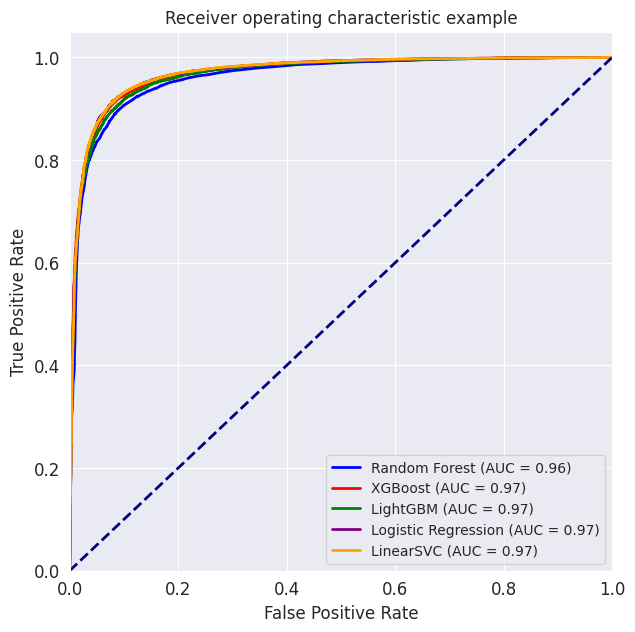

In [ ]:
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']

models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(random_state=42),
    # "Naive Bayes": MultinomialNB(),
    "LinearSVC": CalibratedClassifierCV(LinearSVC(random_state=42, dual=False), method='sigmoid')
}

results = []
plt.figure(figsize=(7, 7))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train_bert, Y_train)
    Y_pred = model.predict(X_test_bert)
    accuracy = accuracy_score(Y_test, Y_pred)

    # probability
    if hasattr(model, "predict_proba"):
        Y_pred_proba = model.predict_proba(X_test_bert)[:, 1]
    else:
        Y_pred_proba = model.decision_function(X_test_bert)  # for SVM

    # ROC-AUC
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
    roc_auc = auc(fpr, tpr)
    results.append((name, accuracy, roc_auc))

    plt.plot(fpr, tpr, color=colors[idx], lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # result
    print(f"\nModel: {name}")
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))
    print("-" * 50)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Deep Learning and Transfer Learning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294240 entries, 0 to 294239
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   verified   294240 non-null  bool   
 1   asin       294240 non-null  object 
 2   text       294240 non-null  object 
 3   sentiment  294240 non-null  float64
 4   text_orig  294240 non-null  object 
dtypes: bool(1), float64(1), object(3)
memory usage: 9.3+ MB


In [ ]:
df_40.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117696 entries, 192061 to 210191
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   verified   117696 non-null  bool   
 1   asin       117696 non-null  object 
 2   text       117696 non-null  object 
 3   sentiment  117696 non-null  float64
 4   text_orig  117696 non-null  object 
dtypes: bool(1), float64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
from transformers import BertConfig, BertTokenizer, BertForSequenceClassification

config = BertConfig.from_pretrained('bert-base-uncased', finetuning_task='binary')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# There is a change in behavior of the truncation while calling the encode function.
# This produces a warning and the behavior will probably change in future
# Currently supress the warning as described - https://github.com/huggingface/transformers/issues/5397
import warnings; ###
warnings.filterwarnings('ignore'); ###

def get_tokens(text, tokenizer, max_seq_length, add_special_tokens=True):
  input_ids = tokenizer.encode(text,
                               add_special_tokens=add_special_tokens,
                               max_length=max_seq_length,
                               pad_to_max_length=True)
  attention_mask = [int(id > 0) for id in input_ids]
  assert len(input_ids) == max_seq_length
  assert len(attention_mask) == max_seq_length
  return (input_ids, attention_mask)


In [2]:
# text = "Here is the sentence I want embeddings for."
# input_ids, attention_mask = get_tokens(text,
#                                        tokenizer,
#                                        max_seq_length=30,
#                                        add_special_tokens = True)
# input_tokens = tokenizer.convert_ids_to_tokens(input_ids)
# print (text)
# print (input_tokens)
# print (input_ids)
# print (attention_mask)

In [ ]:
%%time

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text_orig'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])
X_train_tokens = X_train.apply(get_tokens, args=(tokenizer, 50))
X_test_tokens = X_test.apply(get_tokens, args=(tokenizer, 50))

CPU times: user 1min 43s, sys: 334 ms, total: 1min 44s
Wall time: 1min 44s


In [ ]:
X_train_tokens.values

array([([101, 3898, 2746, 2041, 2044, 1015, 3204, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       ([101, 2023, 2003, 2026, 2117, 2161, 2007, 2023, 3528, 1998, 2009, 2003, 18783, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       ([101, 16142, 18059, 1020, 3835, 1998, 1055, 11231, 2290, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import torch
from torch.utils.data import TensorDataset

# Generate the Tensors for the id, mask and outcome vectors for the training set

input_ids_train = torch.tensor(
    [features[0] for features in X_train_tokens.values], dtype=torch.long)
input_mask_train = torch.tensor(
    [features[1] for features in X_train_tokens.values], dtype=torch.long)
label_ids_train = torch.tensor(Y_train.values, dtype=torch.long)

print (input_ids_train.shape)
print (input_mask_train.shape)
print (label_ids_train.shape)

torch.Size([235392, 50])
torch.Size([235392, 50])
torch.Size([235392])


In [ ]:
input_ids_train[2]

tensor([  101, 16142, 18059,  1020,  3835,  1998,  1055, 11231,  2290,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
# Generate the Tensor for the training dataset
train_dataset = TensorDataset(input_ids_train,input_mask_train,label_ids_train)

In [ ]:
# Generate the input vector and matrix tensors for the test set

input_ids_test = torch.tensor([features[0] for features in X_test_tokens.values],
                              dtype=torch.long)
input_mask_test = torch.tensor([features[1] for features in X_test_tokens.values],
                               dtype=torch.long)
label_ids_test = torch.tensor(Y_test.values,
                              dtype=torch.long)
test_dataset = TensorDataset(input_ids_test, input_mask_test, label_ids_test)

In [ ]:
# provide the training batch information

from torch.utils.data import DataLoader, RandomSampler

train_batch_size = 64
num_train_epochs = 2

train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset,
                              sampler=train_sampler,
                              batch_size=train_batch_size)
t_total = len(train_dataloader) * num_train_epochs

print ("Num training examples = ", len(train_dataset))
print ("Train batch size  = ", train_batch_size)
print ("Num training steps in an epoch = ", len(train_dataloader))
print ("Num Epochs = ", num_train_epochs)
print ("Total num training steps = ", t_total)

Num training examples =  235392
Train batch size  =  64
Num training steps in an epoch =  3678
Num Epochs =  2
Total num training steps =  7356


In [ ]:
# provide the training parameters optimization

from transformers import AdamW, get_linear_schedule_with_warmup

learning_rate = 1e-4
adam_epsilon = 1e-8
warmup_steps = 0

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=adam_epsilon)
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=warmup_steps,
                                            num_training_steps=t_total)

In [ ]:
%%time
from tqdm import trange, notebook

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_iterator = trange(num_train_epochs, desc="Epoch")

## Put model in 'train' mode
model.train()

for epoch in train_iterator:
    epoch_iterator = notebook.tqdm(train_dataloader, desc="Iteration")
    for step, batch in enumerate(epoch_iterator):

        ## Reset all gradients at start of every iteration
        model.zero_grad()

        ## Put the model and the input observations to GPU
        model.to(device)
        batch = tuple(t.to(device) for t in batch)

        ## Identify the inputs to the model
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        ## Forward Pass through the model. Input -> Model -> Output
        outputs = model(**inputs)

        ## Determine the deviation (loss)
        loss = outputs[0]
        print("\r%f" % loss, end='')

        ## Back-propogate the loss (automatically calculates gradients)
        loss.backward()

        ## Prevent exploding gradients by limiting gradients to 1.0
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        ## Update the parameters and learning rate
        optimizer.step()
        scheduler.step()

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/3678 [00:00<?, ?it/s]

0.071522

Epoch:  50%|█████     | 1/2 [17:46<17:46, 1066.98s/it]

Iteration:   0%|          | 0/3678 [00:00<?, ?it/s]

0.055968

Epoch: 100%|██████████| 2/2 [35:43<00:00, 1071.85s/it]

CPU times: user 25min 13s, sys: 10min 35s, total: 35min 48s
Wall time: 35min 43s


In [ ]:
model.save_pretrained('outputs')

In [ ]:
%%time

import numpy as np
from torch.utils.data import SequentialSampler
from tqdm import trange, notebook
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_batch_size = 64
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset,
                             sampler=test_sampler,
                             batch_size=test_batch_size)

# Load the pre-trained model that was saved earlier
model = model.from_pretrained('./outputs')


# Initialize the prediction and actual labels
preds = None
out_label_ids = None
probs = None

## Put model in "eval" mode
model.eval()

for batch in notebook.tqdm(test_dataloader, desc="Evaluating"):

    ## Put the model and the input observations to GPU
    model.to(device)
    batch = tuple(t.to(device) for t in batch)

    ## Do not track any gradients since in 'eval' mode
    with torch.no_grad():
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        ## Forward pass through the model
        outputs = model(**inputs)

        ## We get loss since we provided the labels
        tmp_eval_loss, logits = outputs[:2]

        ## There maybe more than one batch of items in the test dataset
        if preds is None:
            preds = logits.detach().cpu().numpy()
            out_label_ids = inputs['labels'].detach().cpu().numpy()
            probs = F.softmax(logits, dim=-1).cpu().numpy()
        else:
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(out_label_ids,
                                      inputs['labels'].detach().cpu().numpy(),
                                      axis=0)
            probs = np.append(probs, F.softmax(logits, dim=-1).cpu().numpy(), axis=0)


Evaluating:   0%|          | 0/920 [00:00<?, ?it/s]

CPU times: user 1min 23s, sys: 215 ms, total: 1min 23s
Wall time: 1min 23s


In [ ]:
## Get final loss, predictions and accuracy
from sklearn.metrics import accuracy_score
preds = np.argmax(preds, axis=1)
acc_score = accuracy_score(out_label_ids,preds)
print ('Accuracy Score on Test data ', acc_score)

Accuracy Score on Test data  0.955971315932572


In [ ]:
## ROC AUC Score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(out_label_ids, probs[:,1])
print('ROC AUC on test data ', auc)

ROC AUC on test data  0.9885417949251247
